In [1]:
# 구글드라이브에서 데이터를 사용하기 위해서 Mount를 하는 코드입니다.
# 구글 계정으로 로그인하여, 구글드라이브에 있는 실습용 데이터를 사용할 수 있게 인증하는 방식입니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 실습용 데이터셋이 있는 경로입니다. (*** 구글드라이브 내 경로 ***)
# 본인의 경로에 맞게 수정해서 사용하세요. (자세한 사용법은 함께 제공되는 튜토리얼 영상을 확인하세요)
base_path = "/content/drive/MyDrive/Colab Notebooks/[초격차] 데이터 분석/input"

In [3]:
# 정형 데이터를 불러오고 조작하기 위해 Pandas 라이브러리를 사용합니다.
import pandas as pd
# 지정한 경로에 있는 데이터를 불러옵니다. csv 파일이냐 xlsx 파일이냐에 따라 사용하는 함수가 다릅니다.
data = pd.read_excel(base_path + "/#13_쇼핑몰 품목별 매출 데이터.xlsx")
data

,customer id,year,month,class name,skus viewed,skus added to cart,skus purchased,Revenue generated,year-month
0,21,2016,9,Accent Pillows,3,0,0,0,9-2016
1,21,2016,9,Area Rugs,6,1,0,0,9-2016
2,21,2016,9,Bar Stools,30,0,0,0,9-2016
3,21,2016,9,Beds,27,4,0,0,9-2016
4,21,2016,9,Curtains & Drapes,1,0,0,0,9-2016
...,...,...,...,...,...,...,...,...,...
9995,1155758,2018,8,Curtains & Drapes,3,0,0,0,8-2018
9996,1164072,2018,8,Bedding Sets,4,1,1,70,8-2018
9997,1187280,2018,8,Sheets And Sheet Sets,5,0,0,0,8-2018
9998,1196726,2018,8,Beds,0,0,0,0,8-2018


In [4]:
# 불러온 데이터셋에 대한 전반적인 정보를 확인하는 함수입니다.
# row수, column수, 결측치 수, column별 data type을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer id         10000 non-null  int64 
 1   year                10000 non-null  int64 
 2   month               10000 non-null  int64 
 3   class name          10000 non-null  object
 4   skus viewed         10000 non-null  int64 
 5   skus added to cart  10000 non-null  int64 
 6   skus purchased      10000 non-null  int64 
 7   Revenue generated   10000 non-null  int64 
 8   year-month          10000 non-null  object
dtypes: int64(7), object(2)
memory usage: 703.2+ KB


In [5]:
# 데이터의 통계량을 확인합니다.
data.describe()

,customer id,year,month,skus viewed,skus added to cart,skus purchased,Revenue generated
count,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000
mean,4.492002e+05,2017.171700,6.43870,13.643600,0.82620,0.056600,10.349200
std,3.620399e+05,0.682983,3.48945,70.043982,4.63786,0.288452,65.363813
min,2.100000e+01,2016.000000,1.00000,0.000000,0.00000,0.000000,0.000000
25%,1.146330e+05,2017.000000,3.00000,1.000000,0.00000,0.000000,0.000000
50%,3.876110e+05,2017.000000,7.00000,2.000000,0.00000,0.000000,0.000000
75%,7.485710e+05,2018.000000,9.00000,6.000000,0.00000,0.000000,0.000000
max,1.214065e+06,2018.000000,12.00000,2599.000000,165.00000,5.000000,1385.000000


In [6]:
# DataFrame 기준으로 correlation matrix를 만듭니다.
# pd.DataFrame.corr() 함수를 사용합니다.
corr = data.corr()
corr

,customer id,year,month,skus viewed,skus added to cart,skus purchased,Revenue generated
customer id,1.000000,0.021518,-0.028854,0.001330,0.003770,0.011749,0.024231
year,0.021518,1.000000,-0.554396,-0.039087,-0.028118,0.008537,0.013964
month,-0.028854,-0.554396,1.000000,-0.006430,-0.004898,0.005236,-0.003617
skus viewed,0.001330,-0.039087,-0.006430,1.000000,0.926280,0.030292,0.028785
skus added to cart,0.003770,-0.028118,-0.004898,0.926280,1.000000,0.099529,0.078978
skus purchased,0.011749,0.008537,0.005236,0.030292,0.099529,1.000000,0.743979
Revenue generated,0.024231,0.013964,-0.003617,0.028785,0.078978,0.743979,1.000000


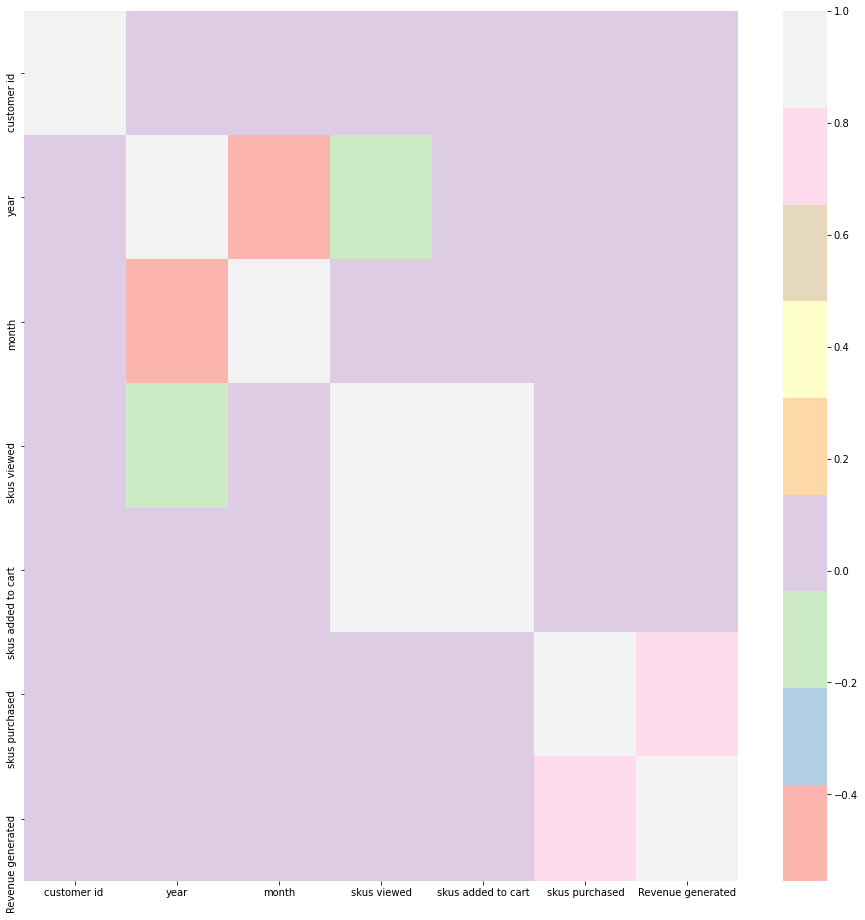

In [7]:
# 그래프를 출력할 때 필요한 설정을 해주는 matplotlib.pyplot을 불러옵니다.
import matplotlib.pyplot as plt
# heatmap을 그려주는 라이브러리인 seaborn을 불러옵니다.
import seaborn as sns

# 출력할 plot의 크기를 정해줍니다. 16 x 16의 크기로 지정합니다.
plt.figure(figsize=(16, 16))
# 위에서 만든 corr를 기준으로 heatmap을 그립니다.
sns.heatmap(corr, cmap=sns.color_palette("Pastel1"))
# plot을 출력합니다.
plt.show()